<a href="https://colab.research.google.com/github/jevylux/pytorchtraining/blob/main/pytorchClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch classification - Neural network classification

In [2]:
import sklearn # machine lerarning tools
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
print(len(X), len(y))

1000 1000


In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make Dataframe with circle data
import pandas as pd
circles = pd.DataFrame({"X1 " : X[:, 0],
                       "X2 " : X[:, 1],
                       "label " : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


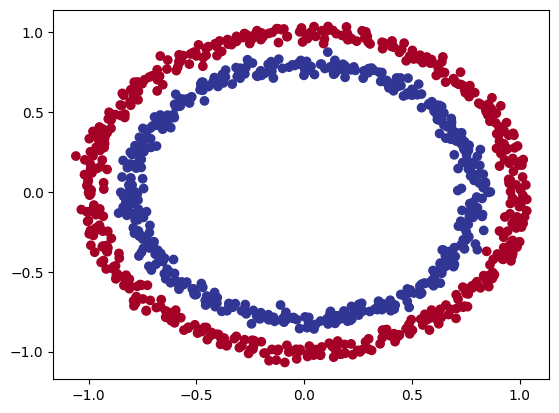

In [5]:
# Visualize, Visualize, Visialize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

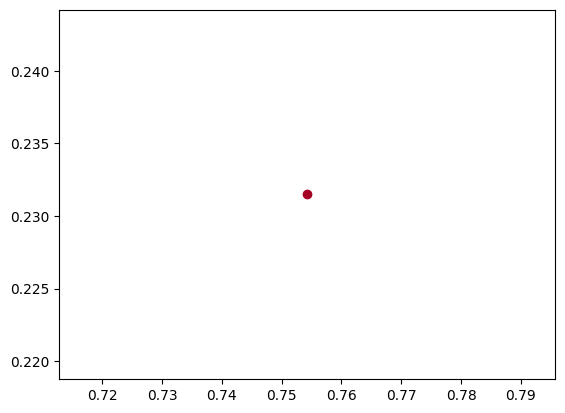

In [6]:
# Visualize, Visualize, Visialize only one circle ( to learn how array indexing works)
import matplotlib.pyplot as plt
plt.scatter(x=X[:1, 0],
            y=X[:1, 1],
            c=y[:1],
            cmap=plt.cm.RdYlBu);

In [7]:
X.shape, y.shape


((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

print(type(X), X.dtype)

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()
<class 'numpy.ndarray'> float64


In [9]:
# turn data into tensors
import torch
print(torch.__version__)
X = torch.from_numpy(X).type(torch.float) # transform numpy array of float 64 into a pytorch tensor of float 32
y = torch.from_numpy(y).type(torch.float)


print(X[:5], y[:5]) # print first 5 elements of the pytorch tensor
print(type(X), X.dtype, y.dtype)

2.1.0+cu118
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])
<class 'torch.Tensor'> torch.float32 torch.float32


In [10]:
# split data into training and tests sets, randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,   # 0.2 = 20% of data will be test and 80% will be train)
                                                    random_state=42) # like random seed for pytorch this is a random seed for sklearn
print(len(X_train), len(X_test), len(y_train), len(y_test))


800 200 800 200


In [11]:
# building a model to classify the blue and red dots
# setup device agnostic code, construct a model, define a loss function and optimizer, create a training and test loop
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)



cuda


In [12]:
# construction of the model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 nn.Linear layers capbale of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # the value of out_features is arbitrary
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # the in_features must match the out_features of the previus layer

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
# to play around with the model, we could use https://playground.tensorflow.org/

In [14]:
# let's replicate the model abaove using nn.Sequential()
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:

with torch.inference_mode():
  untrained_preds = model_1(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, Shape:_preds.shape {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape:_preds.shape {X_test.shape}")
print(f"First 10 predictions :\n {untrained_preds[:10]}")
print(f"First 10 labels :\n {y_test[:10]}")

Length of predictions : 200, Shape:_preds.shape torch.Size([200, 1])
Length of test samples : 200, Shape:_preds.shape torch.Size([200, 2])
First 10 predictions :
 tensor([[-0.0587],
        [-0.1807],
        [ 0.1890],
        [-0.1286],
        [ 0.0747],
        [ 0.0011],
        [-0.2517],
        [-0.2094],
        [ 0.1935],
        [-0.1902]], device='cuda:0')
First 10 labels :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [16]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [17]:

# Setup a loss function and optimizer
# for regression, you might want to use MAE or MSE
# for classification, you might use binary cross entropy or categorical cros entropy
# https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.1)

# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc






In [18]:
# @title Default title text
### training a model

# to train our model we need a training loop - forward pass - calculate loss- optimizer zero gradients - loass backward (backpropagation) - optimzer step
model_1




Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[-0.0587],
        [-0.1807],
        [ 0.1890],
        [-0.1286],
        [ 0.0747]], device='cuda:0')

In [20]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [21]:
# use the sigmoid function on our model logits to get probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4853],
        [0.4549],
        [0.5471],
        [0.4679],
        [0.5187]], device='cuda:0')

In [22]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)
# in full
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))
# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [23]:
# building a training and test loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop
print(next(model_1.parameters()).is_cuda)
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2 calculate loss
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input versus
  #               y_train)
  loss = loss_fn(y_logits,     #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)


  # 3 optimier zero grad
  optimizer.zero_grad()

  # 4 loss backward

  loss.backward()

  # 5 optimizer step
  optimizer.step()

  # testing

  model_1.eval()
  with torch.inference_mode():
    # 1 forward path
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2 calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc : {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


True
Epoch: 0 | Loss: 0.69797, Acc : 49.00 | Test loss: 0.69095, Test acc: 54.00%
Epoch: 10 | Loss: 0.69727, Acc : 48.75 | Test loss: 0.69086, Test acc: 53.00%
Epoch: 20 | Loss: 0.69671, Acc : 49.00 | Test loss: 0.69083, Test acc: 53.00%
Epoch: 30 | Loss: 0.69624, Acc : 49.12 | Test loss: 0.69084, Test acc: 53.00%
Epoch: 40 | Loss: 0.69584, Acc : 49.00 | Test loss: 0.69087, Test acc: 53.00%
Epoch: 50 | Loss: 0.69550, Acc : 48.88 | Test loss: 0.69092, Test acc: 53.00%
Epoch: 60 | Loss: 0.69521, Acc : 48.75 | Test loss: 0.69098, Test acc: 53.00%
Epoch: 70 | Loss: 0.69496, Acc : 48.75 | Test loss: 0.69106, Test acc: 53.00%
Epoch: 80 | Loss: 0.69474, Acc : 48.75 | Test loss: 0.69114, Test acc: 53.50%
Epoch: 90 | Loss: 0.69455, Acc : 48.62 | Test loss: 0.69123, Test acc: 53.50%
Epoch: 100 | Loss: 0.69438, Acc : 48.62 | Test loss: 0.69133, Test acc: 53.50%
Epoch: 110 | Loss: 0.69424, Acc : 48.62 | Test loss: 0.69142, Test acc: 54.00%
Epoch: 120 | Loss: 0.69411, Acc : 48.75 | Test loss: 0.691

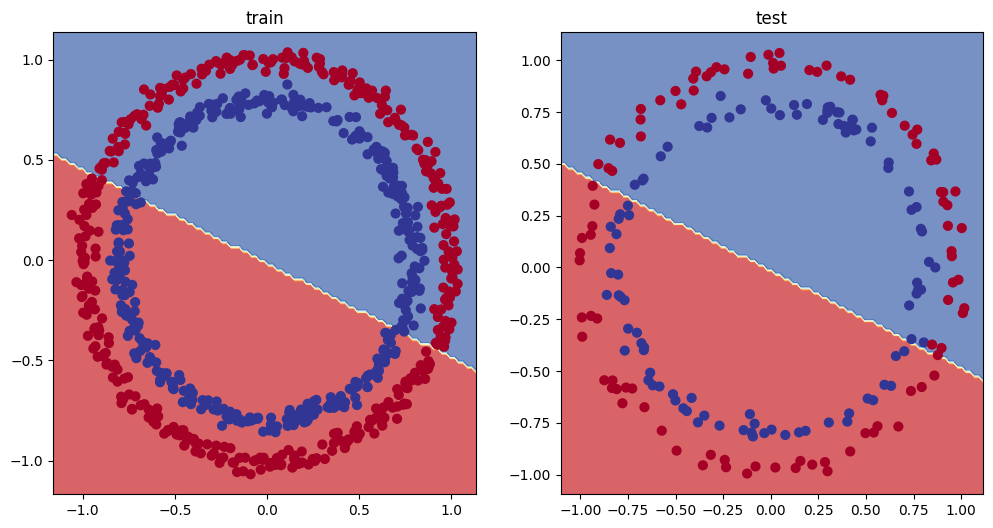

In [24]:
# make predctictions and evaluate the model
import requests
from pathlib import Path# download helper functions from Learn Pytorch if it is not already existing

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helperfunctions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test, y_test)

In [25]:
# 5 improving a model
# add more layers - add more hidden units - fir for longer - change activation function - change learning rate - change loss function


class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)


  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z
    #.the 4 lines above could be replaced by the following line
    # return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_2 = CircleModelV1().to(device)
print(model_2)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  model_2.train()
  y_logits =model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test loss: 0.69379, test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69437, test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69458, test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test loss: 0.69465, test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69467, test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, test acc: 46.00%


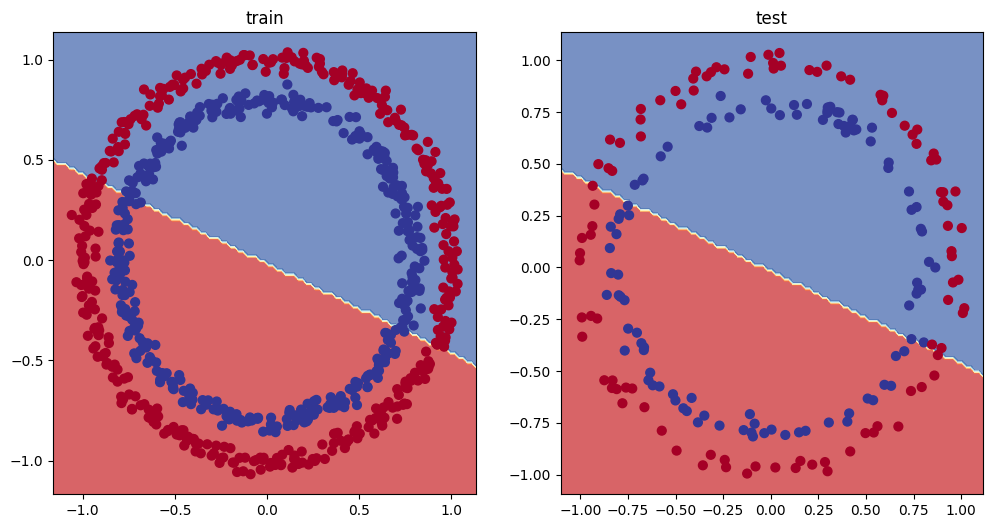

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_2,X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_2,X_test, y_test)

In [28]:
from operator import length_hint
# preparing data to see if our model can fit a straight line
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [29]:
# create train an test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
# check the lenghts of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

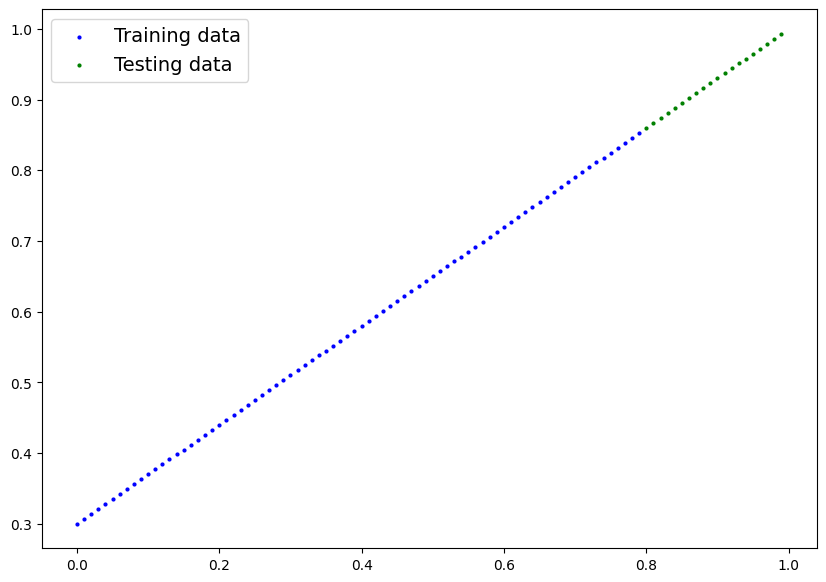

In [30]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [31]:
# adjustiing model_2 to fit s straight line
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [32]:
# same architecture as model_2 ( but using nn.Sequential())
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# loss and optimier
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                             lr=0.01)
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# training
for epoch in range(epochs):
  y_pred = model_3(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


In [34]:
model_3.eval()
with torch.inference_mode():
  y_preds = model_3(X_test_regression)


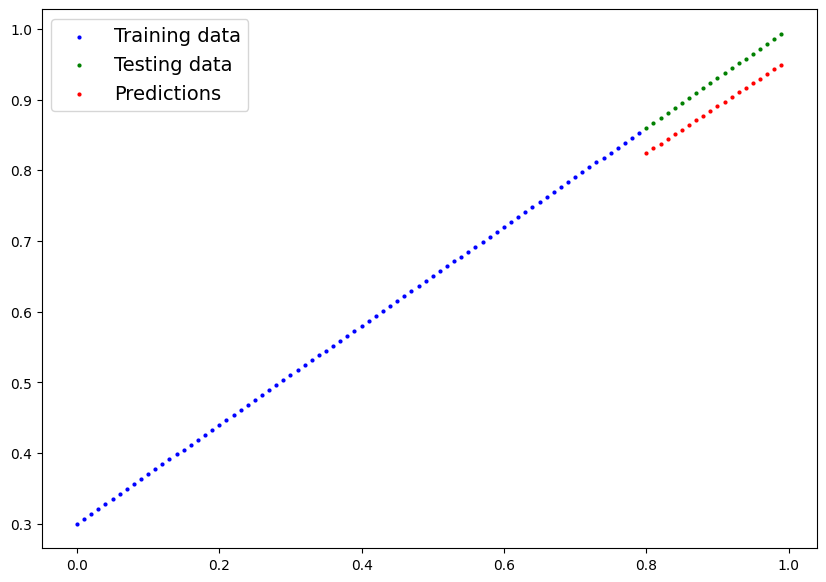

In [35]:
# this will give an error in the ploting data functions unless we transfer everything to cpu !
# plot the data
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

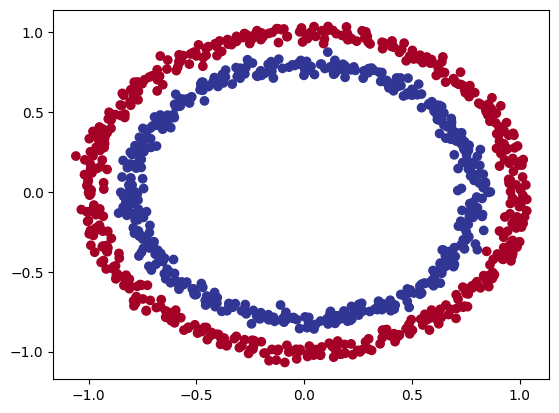

In [61]:
# the missing piece: non-linearity
# recreating non-linear data
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [62]:
# convert data to tensors and then to train and tesdt splits

import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [63]:
# build a model with a non linear function
from torch import nn
class CircleModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non_linear activation function

  def forward(self, x):
    # where should we put our non-linear activation functions ?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV4().to(device)
model_4

CircleModelV4(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [64]:
 # setup loss and optimizer
 loss_fn = nn.BCEWithLogitsLoss()
 optimizer = torch.optim.SGD(model_4.parameters(),
                             lr = 0.1)
# train a model with non_linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 10000
for epoch in range(epochs):
  model_4.train()

  # forward pass
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits > prediction probabilities > prediction labels
  # calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithlogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true = y_train,
                     y_pred = y_pred)

  #optimizer
  optimizer.zero_grad()
  # loss backward
  loss.backward()
  # step the optimizer
  optimizer.step()
  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                         y_pred = test_pred)
    # print whats happening

    if epoch % 100 == 0:
      print(f"Epoch : {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss : {test_loss:.4f}, Test Acc: {test_acc:.2f}")

Epoch : 0 | Loss: 0.6929, Acc: 50.00% | Test loss : 0.6932, Test Acc: 50.00
Epoch : 100 | Loss: 0.6912, Acc: 52.88% | Test loss : 0.6910, Test Acc: 52.50
Epoch : 200 | Loss: 0.6898, Acc: 53.37% | Test loss : 0.6894, Test Acc: 55.00
Epoch : 300 | Loss: 0.6879, Acc: 53.00% | Test loss : 0.6872, Test Acc: 56.00
Epoch : 400 | Loss: 0.6852, Acc: 52.75% | Test loss : 0.6841, Test Acc: 56.50
Epoch : 500 | Loss: 0.6810, Acc: 52.75% | Test loss : 0.6794, Test Acc: 56.50
Epoch : 600 | Loss: 0.6751, Acc: 54.50% | Test loss : 0.6729, Test Acc: 56.00
Epoch : 700 | Loss: 0.6666, Acc: 58.38% | Test loss : 0.6632, Test Acc: 59.00
Epoch : 800 | Loss: 0.6516, Acc: 64.00% | Test loss : 0.6476, Test Acc: 67.50
Epoch : 900 | Loss: 0.6236, Acc: 74.00% | Test loss : 0.6215, Test Acc: 79.00
Epoch : 1000 | Loss: 0.5682, Acc: 87.75% | Test loss : 0.5738, Test Acc: 86.50
Epoch : 1100 | Loss: 0.4815, Acc: 93.50% | Test loss : 0.4993, Test Acc: 90.50
Epoch : 1200 | Loss: 0.3706, Acc: 97.75% | Test loss : 0.4059, T

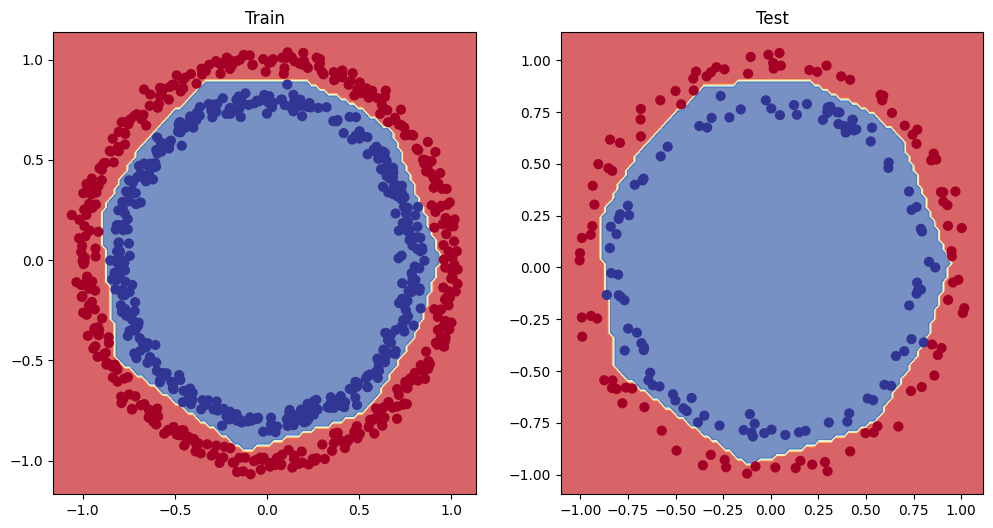

In [65]:
# evaluate the model
model_4.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)